In [1]:
import fastf1 as ff1
from fastf1 import plotting

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

plotting.setup_mpl()

In [2]:
pd.options.mode.chained_assignment = None 

In [3]:
race = ff1.get_session(2023, 'Monza', 'R')

laps = race.load_laps(with_telemetry=True)

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

C:\Users\Imran\anaconda3\lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Italian Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO

In [4]:
laps_ver = laps.pick_driver('VER')

# Laps chosen: Lap 5, Lap 10, Lap 15
lap_5 = laps_ver.loc[laps_ver['LapNumber'] == 5].get_car_data().add_distance()
lap_10 = laps_ver.loc[laps_ver['LapNumber'] == 10].get_car_data().add_distance()
lap_15 = laps_ver.loc[laps_ver['LapNumber'] == 15].get_car_data().add_distance()

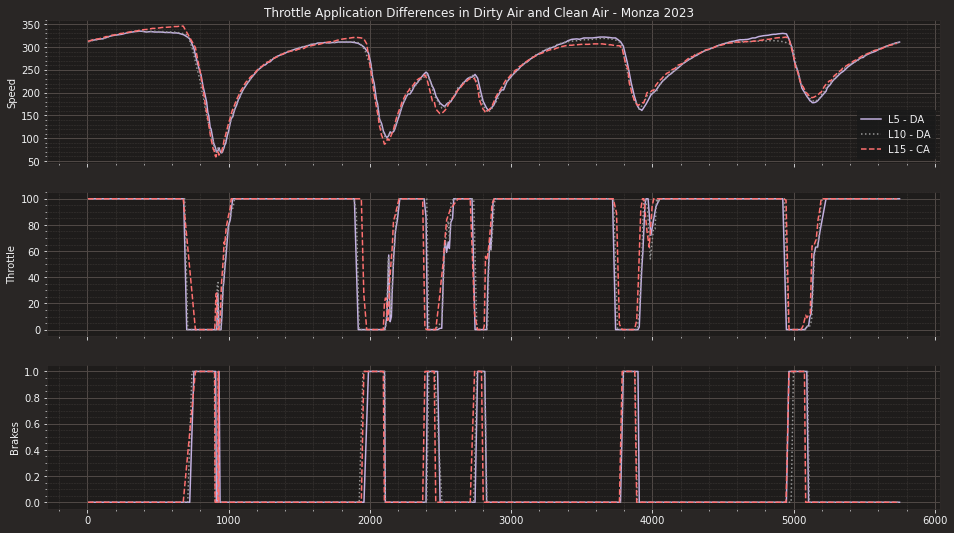

In [5]:
fig, ax = plt.subplots(3, figsize = (16, 9))
fig.suptitle("Throttle Application Differences in Dirty Air and Clean Air - Monza 2023", y=0.9)

### DA = Dirty Air, CA = Clean Air
ax[0].plot(lap_5['Distance'], lap_5['Speed'], color='#C3B1E1', label='L5 - DA')
ax[0].plot(lap_10['Distance'], lap_10['Speed'], color='#989898', linestyle='dotted', label='L10 - DA')
ax[0].plot(lap_15['Distance'], lap_15['Speed'], color='#FF7070', linestyle='dashed', label='L15 - CA')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

ax[1].plot(lap_5['Distance'], lap_5['Throttle'], color='#C3B1E1', label='L5 - DA')
ax[1].plot(lap_10['Distance'], lap_10['Throttle'], color='#989898', linestyle='dotted', label='L10 - DA')
ax[1].plot(lap_15['Distance'], lap_15['Throttle'], color='#FF7070', linestyle='dashed', label='L15 - CA')
ax[1].set(ylabel='Throttle')

ax[2].plot(lap_5['Distance'], lap_5['Brake'], color='#C3B1E1', label='L5 - DA')
ax[2].plot(lap_10['Distance'], lap_10['Brake'], color='#989898', linestyle='dotted', label='L10 - DA')
ax[2].plot(lap_15['Distance'], lap_15['Brake'], color='#FF7070', linestyle='dashed', label='L15 - CA')
ax[2].set(ylabel='Brakes')

for a in ax.flat:
    a.label_outer()
    
plt.show()

In [6]:
fig.savefig('Throttle Application Differences in Dirty Air and Clean Air - Monza 2023.png', dpi = 600)